<a href="https://colab.research.google.com/github/sandhyajnv/Deep-Learning-/blob/main/Classification_task_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

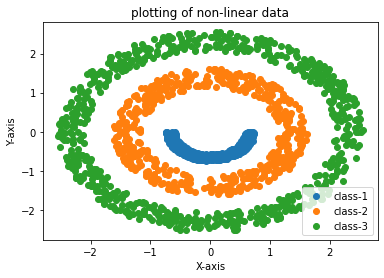

In [ ]:


my_file = open("/content/drive/MyDrive/NLS_Group11.txt", "r")
data = my_file.read()
data_into_list = data.split("\n")
data_into_list=data_into_list[1:]




new=[]

for i in range(len(data_into_list[:-1])):
  a=data_into_list[i]
  a=a.split(" ")
  a=a[:2]
  a=np.array(a)
  a=np.float_(a)
  a=list(a)
  new.append(a)


class1x=[]
class1y=[]
class2x=[]
class2y=[]
class3x=[]
class3y=[]
for i in range(0,500):
  class1x.append(new[i][0])
  class1y.append(new[i][1])
for i in range(500,1000):
  class2x.append(new[i][0])
  class2y.append(new[i][1])
for i in range(1000,1700):
  class3x.append(new[i][0])
  class3y.append(new[i][1])



plt.title("plotting of non-linear data")
plt.xlabel("X-axis")
plt.ylabel('Y-axis')
plt.scatter(class1x,class1y,label="class-1",)
plt.scatter(class2x,class2y,label="class-2")
plt.scatter(class3x,class3y,label="class-3")
plt.legend()
plt.show()







In [ ]:
class_1=np.array(new[:500])
class_2=np.array(new[500:1000])
class_3=np.array(new[1000:1700])


class1_train=class_1[:round(class_1.shape[0]*0.7)]
class2_train=class_2[:round(class_2.shape[0]*0.7)]
class3_train=class_3[:round(class_3.shape[0]*0.7)]
class1_test=class_1[round(class_1.shape[0]*0.7):]
class2_test=class_2[round(class_2.shape[0]*0.7):]
class3_test=class_3[round(class_3.shape[0]*0.7):]


#print(class1_training.shape[0],class2_training.shape[0],class3_training.shape[0])

x1=np.ones((class1_train.shape[0],1))
x2=np.ones((class2_train.shape[0],1))
x3=np.ones((class3_train.shape[0],1))
class1_training = np.hstack((x1,class1_train))
class2_training = np.hstack((x2,class2_train))
class3_training = np.hstack((x3,class3_train))
#k1=np.ones(class1_training.shape[0])
#k2=np.zeros(class2_training.shape[0])
gtC12=np.concatenate([np.ones(class1_training.shape[0]),np.zeros(class2_training.shape[0])])
gtC23=np.concatenate([np.ones(class2_training.shape[0]),np.zeros(class3_training.shape[0])])
gtC13=np.concatenate([np.ones(class1_training.shape[0]),np.zeros(class3_training.shape[0])])



   










In [ ]:
x1=np.ones((class1_test.shape[0],1))
x2=np.ones((class2_test.shape[0],1))
x3=np.ones((class3_test.shape[0],1))
class1_testing = np.hstack((x1,class1_test))
class2_testing = np.hstack((x2,class2_test))
class3_testing = np.hstack((x3,class3_test))



In [ ]:
def perceptron(C,gt):
  eavg=0
  E=[] # collection of error
  Epoch=[] 
  epoch=0 
  n=0.03 # learning rate
  d=1
 
  minX=min(C[:,1])
  maxX=max(C[:,1])
  minY=min(C[:,2])
  maxY=max(C[:,2])
  w0=np.random.uniform(minX,maxX)
  wx=np.random.uniform(minX,maxX)
  wy=np.random.uniform(minY,maxY)
 
  W=[1,1,1] # initialisation
  W=np.array(W)
  # while(d>0.0001):
  for _ in range(1000):
  
    

    e=[] # collection of instantanous error
    for i in range(len(C)):
      x=C[i]
      
      a=np.matmul(W,np.transpose(x))
      f=1/(1+np.exp(-a)) # signal

      if f>0.5:
        s=1
        
      else:
       
        s=0
      err=0.5*(gt[i]-s)**2 #instantaneous error
      e.append(err)
      k=n*(gt[i]-s)*f*(1-f) #learning rate and delta
      W=W+k*x #update
     

   


    e=np.array(e)
    eavg=np.sum(e)/len(e)
    d=d-eavg
    epoch=epoch+1
    E.append(eavg)
    Epoch.append(epoch)
  return(W,Epoch,E)

In [ ]:


C12=[]
for i in range(len(class1_training)):
  C12.append(class1_training[i])
for i in range(len(class2_training)):
  C12.append(class2_training[i])

C12=np.array(C12)


C23=[]
for i in range(len(class2_training)):
  C23.append(class2_training[i])
for i in range(len(class3_training)):
  C23.append(class3_training[i])

C23=np.array(C23)


C13=[]
for i in range(len(class1_training)):
  C13.append(class1_training[i])
for i in range(len(class3_training)):
  C13.append(class3_training[i])

C13=np.array(C13)



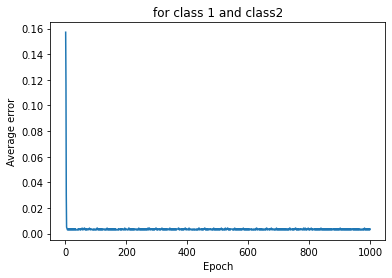

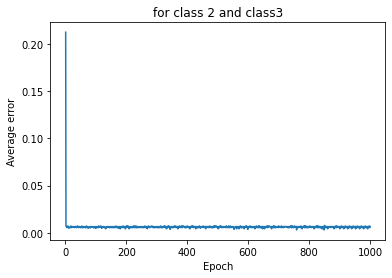

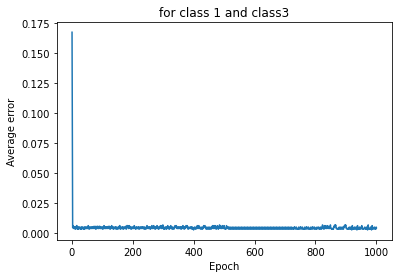

In [ ]:
W12,Epoch12,E12=perceptron(C12,gtC12)
W23,Epoch23,E23=perceptron(C23,gtC23)
W13,Epoch13,E13=perceptron(C13,gtC13)
plt.title("for class 1 and class2")
plt.xlabel("Epoch")
plt.ylabel('Average error')
plt.plot(Epoch12,E12)
plt.show()
plt.title("for class 2 and class3")
plt.xlabel("Epoch")
plt.ylabel('Average error')
plt.plot(Epoch23,E23)
plt.show()
plt.title("for class 1 and class3")
plt.xlabel("Epoch")
plt.ylabel('Average error')
plt.plot(Epoch13,E13)
plt.show()




In [ ]:
def sep_xy(a):
  ax=[]
  ay=[]
 
  for i in range(a.shape[0]):
    ax.append(a[i][0])
    ay.append(a[i][1])

  return(ax,ay)


In [ ]:
def prediction(A,W):
  y=[]
  for i in range(len(A)):
    x=A[i]
    a=np.matmul(W,np.transpose(x))
  
     
    f=1/(1+np.exp(-a))
    
    y.append(f)
  y=np.array(y)
  return(y)


  


In [ ]:
testing=[]
for i in range(len(class1_testing)):
  testing.append(class1_testing[i])
for i in range(len(class2_testing)):
  testing.append(class2_testing[i])
for i in range(len(class3_testing)):
  testing.append(class3_testing[i])

testing=np.array(testing)






(510, 3)


In [ ]:
gttest=[1]*class1_testing.shape[0]+ [2]*class2_testing.shape[0] + [3]*class3_testing.shape[0]
gttest=np.array(gttest)


(510,)


In [ ]:
def classifier(data,W12,W23,W13):
  y12=prediction(data,W12)
  y23=prediction(data,W23)
  y13=prediction(data,W13)
  Y12=[]
  Y23=[]
  Y13=[]
  for i in range(len(y12)):
    if y12[i]>0.5:
      Y12.append(1)
    else:
      Y12.append(2)
  for i in range(len(y23)):
    if y23[i]>0.5:
      Y23.append(2)
    else:
      Y23.append(3)

  for i in range(len(y13)):
    if y13[i]>0.5:
      Y13.append(1)
    else:
      Y13.append(3)
  Y12=np.array(Y12)
  Y23=np.array(Y23)
  Y13=np.array(Y13)
  Y12=Y12.reshape(-1,1)
  Y23=Y23.reshape(-1,1)
  Y13=Y13.reshape(-1,1)
  Y=np.hstack((Y12,Y23,Y13))
 
  p=[]
  for i in range(len(Y)):
    p.append(np.bincount(Y[i]).argmax())
  p=np.array(p)
  return(p)




In [ ]:
def classifierC12(A,W):
  y12=prediction(A,W)

  Y12=[]

  for i in range(len(y12)):
    if y12[i]>0.5:
      Y12.append(1)
    else:
      Y12.append(2)

  Y12=np.array(Y12)
  return(Y12)


def classifierC23(A,W):
  y12=prediction(A,W)

  Y12=[]

  for i in range(len(y12)):
    if y12[i]>0.5:
      Y12.append(2)
    else:
      Y12.append(3)

  Y12=np.array(Y12)
  return(Y12)


def classifierC13(A,W):
  y12=prediction(A,W)

  Y12=[]

  for i in range(len(y12)):
    if y12[i]>0.5:
      Y12.append(1)
    else:
      Y12.append(3)

  Y12=np.array(Y12)
  return(Y12)


 
 


 
  



In [ ]:
C1x,C1y=sep_xy(class1_train)
C2x,C2y=sep_xy(class2_train)
C3x,C3y=sep_xy(class3_train)
Cx=C1x+C2x+C3x
Cy=C1y+C2y+C3y


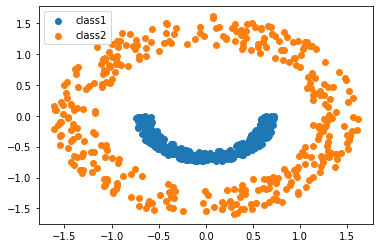

In [ ]:
plt.scatter(C1x,C1y,label="class1")

plt.scatter(C2x,C2y,label="class2")
plt.legend()

In [ ]:
#boundary between class1 and class2
x_arr = np.linspace(-2, 2, 1000)
y_arr = np.linspace(-2, 2, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
mf = region
xone=np.ones((mf.shape[0],1))
k=np.hstack((xone,mf))

z=classifierC12(k,W12)
z = z.reshape(xx.shape)

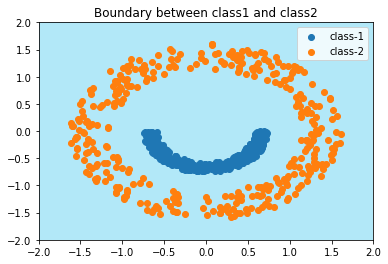

In [ ]:
plt.title("Boundary between class1 and class2")
plt.contourf(xx, yy, z, alpha=0.3, cmap="rainbow")
plt.scatter(class1_train[:, 0],class1_train[:, 1],label="class-1",)
plt.scatter(class2_train[:, 0],class2_train[:, 1],label="class-2",)
plt.legend()
#plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-1",)

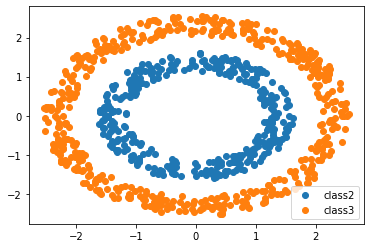

In [ ]:
plt.scatter(C2x,C2y,label="class2")

plt.scatter(C3x,C3y,label="class3")
plt.legend(loc ="lower right")

In [ ]:

x_arr = np.linspace(-3, 3, 1000)
y_arr = np.linspace(-3, 3, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
mf = region
xone=np.ones((mf.shape[0],1))
k=np.hstack((xone,mf))

z=classifierC23(k,W23)
z = z.reshape(xx.shape)

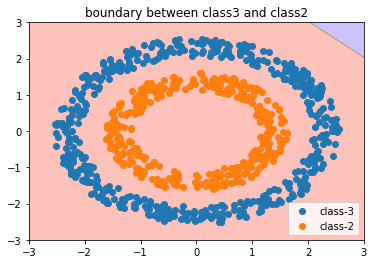

In [ ]:
plt.title("boundary between class3 and class2")
plt.contourf(xx, yy, z, alpha=0.3, cmap="rainbow")
plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-3",)
plt.scatter(class2_train[:, 0],class2_train[:, 1],label="class-2",)
plt.legend(loc ="lower right")
#plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-1",)

In [ ]:

x_arr = np.linspace(-3, 3, 1000)
y_arr = np.linspace(-3, 3, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
mf = region
xone=np.ones((mf.shape[0],1))
k=np.hstack((xone,mf))

z=classifierC13(k,W13)
z = z.reshape(xx.shape)

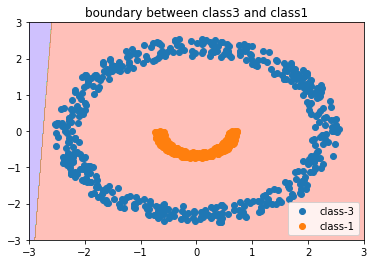

In [ ]:
plt.title("boundary between class3 and class1")
plt.contourf(xx, yy, z, alpha=0.3, cmap="rainbow")
plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-3",)
plt.scatter(class1_train[:, 0],class1_train[:, 1],label="class-1",)
plt.legend(loc ="lower right")
#plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-1",)

In [ ]:
# generating points in the region
x_arr = np.linspace(-3, 3, 1000)
y_arr = np.linspace(-3, 3, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
mf = region

In [ ]:
xone=np.ones((mf.shape[0],1))






In [ ]:
k=np.hstack((xone,mf))


In [ ]:
z=classifier(k,W12,W23,W13)
z = z.reshape(xx.shape)


[[2 3 1]
 [2 3 1]
 [2 3 1]
 ...
 [2 2 3]
 [2 2 3]
 [2 2 3]]


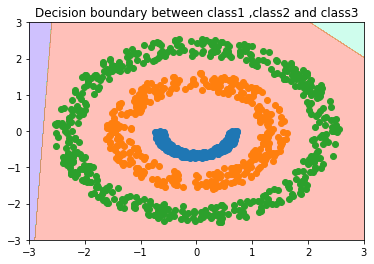

In [ ]:
plt.title("Decision boundary between class1 ,class2 and class3")
plt.contourf(xx, yy, z, alpha=0.3, cmap="rainbow")
plt.scatter(class1_train[:, 0],class1_train[:, 1],label="class-1",)
plt.scatter(class2_train[:, 0],class2_train[:, 1],label="class-1",)
plt.scatter(class3_train[:, 0],class3_train[:, 1],label="class-1",)


In [ ]:
ytest=classifier(testing,W12,W23,W13)



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(gttest, ytest)
print("class1 class2 class3")
print(cm)



class1 class2 class3
[[  0   0 150]
 [  0   0 150]
 [  0   0 210]]


In [ ]:
accuracy=((cm[0,0]+cm[1,1]+cm[2,2])/(ytest.shape[0]))*100
print("Accuracy:{} %".format(accuracy))

Accuracy:41.17647058823529 %
